MRINAL KADAM USC ID: 3135945534

In [1]:
# Import all required packages and libraries 

import pandas as pd 
import numpy as np

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# Read sheet 1 of the excel file into a dataframe

df = pd.read_excel("../data/Folds5x2_pp.xlsx")
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [3]:
# Check for any null values

df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

# (b) Exploring the data:

(b) i. How many rows are in this data set? How many columns? What do the rows
and columns represent?

In [4]:
# Shape of the dataframe

df.shape

(9568, 5)

There are 9568 rows and 5 columns in this dataset.

The rows represent different datapoints of the dataset collected from a Combined Cycle Power Plant over
6 years (2006-2011), when the power plant was set to work with full load.
The columns represent four features (predictors) and one output (response) variable.
Features:-
Hourly Average Ambient Variables Temperature (AT),
Exhaust Vacuum (V), 
Ambient Pressure (AP), 
Relative Humidity (RH) and
Output:-
Net Hourly Electrical Energy Output (PE)  of the plant

(b) ii. Make pairwise scatterplots of all the variables in the data set including the
predictors (independent variables) with the dependent variable. Describe
your findings.

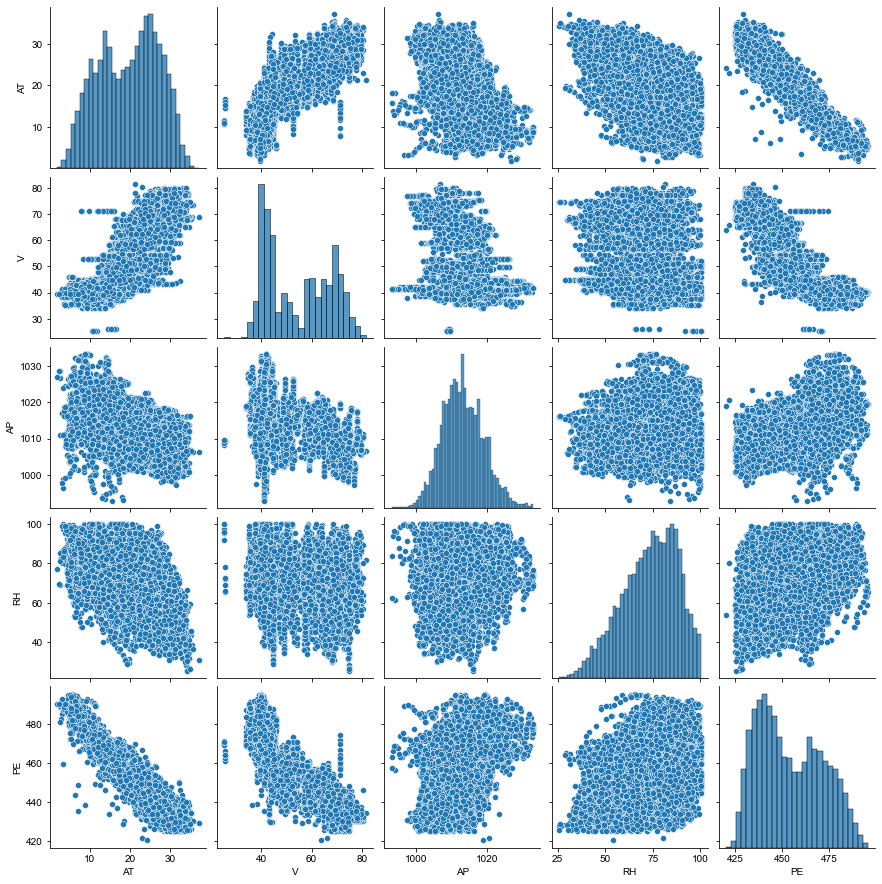

In [5]:
# Using the pairplot function of the seaborn library, plot graphs between all pairs of variables

sns.pairplot(df)
sns.set(rc = {'figure.figsize':(15,15)})

In [6]:
# Find out the correlation between each of the independent variables and the dependent variable

corr_1 = np.corrcoef(df['AT'], df['PE'])
corr_2 = np.corrcoef(df['V'], df['PE'])
corr_3 = np.corrcoef(df['AP'], df['PE'])
corr_4 = np.corrcoef(df['RH'], df['PE'])

print("corr_1:",corr_1)
print('\n')
print("corr_2:",corr_2)
print('\n')
print("corr_3:",corr_3)
print('\n')
print("corr_4:",corr_4)

corr_1: [[ 1.         -0.94812847]
 [-0.94812847  1.        ]]


corr_2: [[ 1.         -0.86978031]
 [-0.86978031  1.        ]]


corr_3: [[1.         0.51842903]
 [0.51842903 1.        ]]


corr_4: [[1.        0.3897941]
 [0.3897941 1.       ]]


Findings-
The pairplot shows strong negative correlations between the independent variables 'AT' and 'V' and the dependent variable 'PE' (with correlations of -0.95 and -0.87). 
The pairplot also shows positive correlations between the independent variables 'AP' and 'RH' and the dependent variable 'PE' (with correlations of 0.52 and 0.39). 

(b) iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [7]:
# Use the descibe function to get the different statistical measures of each of the the variables in the dataset

df_desc = df.describe().T
df_desc.rename(columns = {'50%':'median'}, inplace = True)
df_desc.rename(columns = {'25%':'first quartile'}, inplace = True)
df_desc.rename(columns = {'75%':'third quartile'}, inplace = True)
df_desc['range'] = df_desc['max'] - df_desc['min']
df_desc['interquartile range'] = df_desc['third quartile'] - df_desc['first quartile']

df_desc = df_desc[['mean', 'median', 'range', 'first quartile', 'third quartile', 'interquartile range']]
df_desc

,mean,median,range,first quartile,third quartile,interquartile range
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


# (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [8]:
# First predictor - AT

x = df[['AT']]
y = df[['PE']]

# By default, the statsmodel library fits a line that passes through the origin. But if we observe the simple linear regression equation y = c + mx, it has an intercept value as c. So, to have an intercept, we need to add the add_constant attribute manually.
# Adding a constant to get an intercept

x_sm = sm.add_constant(x)

# Fitting the resgression line using 'OLS'(Ordinary Least Square) method

lr = sm.OLS(y, x_sm).fit()

# Printing the parameters

print("Intercept and Slope:")
lr.params

Intercept and Slope:


const    497.03412
AT        -2.17132
dtype: float64

In [9]:
# Performing a summary to list out all the different parameters of the regression line fitted

print("Summary:")
lr.summary()

Summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:35:46   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.000     496.727     497.341
AT            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
==============================================================================
Omnibus:                      417.457   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.844
Skew:                          -0.209   Prob(JB):                    1.83e-243
Kurtosis:                       4.621   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient for AT is -2.1713, and its corresponding p-value is very low, almost 0. That means that this predictor is statistically significant.

R-squared value is 0.899, which means that 90% of the PE variance can be explained by the AT column using this line.

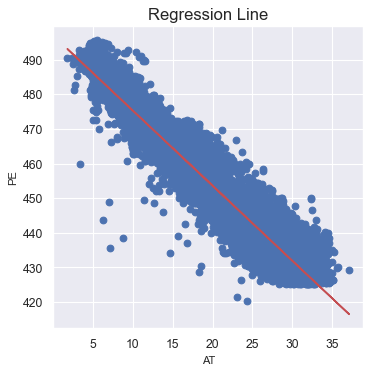

In [10]:
# Visualizing the regression line

figure(figsize=(5, 5), dpi=80)
plt.scatter(x, y)
plt.plot(x, 497.03412 + -2.17132*x, 'r')
plt.title('Regression Line', fontsize = 15)
plt.xlabel('AT', fontsize = 10)
plt.ylabel('PE', fontsize = 10)
plt.show()

In [11]:
# Predicting y_value

y_pred = lr.predict(x_sm)
y_pred = y_pred.to_frame(name='PE')

In [12]:
# Counting the number of outliers in the dataset by the inter quartile method

low_lim = df_desc.T['AT']['first quartile'] - 1.5 * df_desc.T['AT']['interquartile range']
up_lim = df_desc.T['AT']['third quartile'] + 1.5 * df_desc.T['AT']['interquartile range']
print("low_limit is:", low_lim)
print("up_limit is:", up_lim)

df_outliers = df[((df[['AT']] < low_lim) |(df[['AT']] > up_lim)).any(axis=1)]
print('\n')
print("Outliers:")
print(df_outliers[['AT']])

print('\n')
print("Count of outliers is:",len(df_outliers))

low_limit is: -4.804999999999998
up_limit is: 44.035


Outliers:
Empty DataFrame
Columns: [AT]
Index: []


Count of outliers is: 0


      cooks_distance   p-value
0       4.133478e-06  0.999996
1       1.112001e-05  0.999989
2       5.870104e-05  0.999941
3       5.042545e-05  0.999950
4       5.520942e-07  0.999999
...              ...       ...
9563    1.496728e-06  0.999999
9564    4.672671e-06  0.999995
9565    1.798870e-06  0.999998
9566    1.670674e-04  0.999833
9567    1.877990e-05  0.999981

[9568 rows x 2 columns]


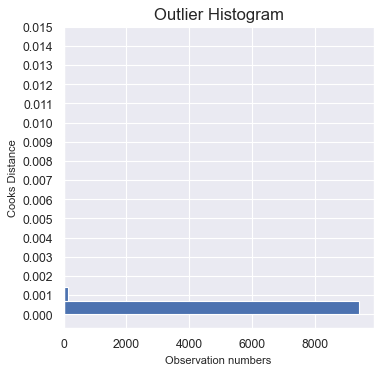

In [13]:
# Data points with large residuals (outliers) and/or high leverage may distort the outcome and accuracy of a regression. 
# Cook’s distance is used to identify influential observations in a regression model.
# Essentially Cook’s distance measures how much all of the fitted values in the model change when the ith observation is deleted.
# The larger the value for Cook’s distance, the more influential a given observation.
# A general rule of thumb is that any observation with a Cook’s distance greater than 4/n (where n = total observations) is considered to be highly influential.

# Create instance of influence

influence = lr.get_influence()

# Obtain Cook's distance for each observation

cooks = influence.cooks_distance
cooks = pd.DataFrame(np.column_stack(cooks),columns=['cooks_distance','p-value'])
print(cooks)

# Outlier detection

figure(figsize=(5, 5), dpi=80)
plt.yticks(np.arange(0, 0.02, 0.001))
plt.hist(cooks['cooks_distance'].to_list(), bins=20, orientation='horizontal') 
plt.title('Outlier Histogram', fontsize = 15)
plt.xlabel('Observation numbers', fontsize = 10)
plt.ylabel('Cooks Distance', fontsize = 10)
plt.show()

In [14]:
# Second predictor - V

x = df[['V']]
y = df[['PE']]

# By default, the statsmodel library fits a line that passes through the origin. But if we observe the simple linear regression equation y = c + mx, it has an intercept value as c. So, to have an intercept, we need to add the add_constant attribute manually.
# Adding a constant to get an intercept

x_sm = sm.add_constant(x)

# Fitting the resgression line using 'OLS'(Ordinary Least Square) method

lr = sm.OLS(y, x_sm).fit()

# Printing the parameters

print("Intercept and Slope:")
lr.params

Intercept and Slope:


const    517.801526
V         -1.168135
dtype: float64

In [15]:
# Performing a summary to list out all the different parameters of the regression line fitted

print("Summary:")
lr.summary()

Summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:35:46   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.000     517.061     518.542
V             -1.1681      0.007   -172.402      0.000      -1.181      -1.155
==============================================================================
Omnibus:                       77.693   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.571
Skew:                          -0.097   Prob(JB):                     1.61e-24
Kurtosis:                       3.487   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient for V is -1.1681, and its corresponding p-value is very low, almost 0. That means that this predictor is statistically significant.

R-squared value is 0.757, which means that 76% of the PE variance can be explained by the V column using this line.

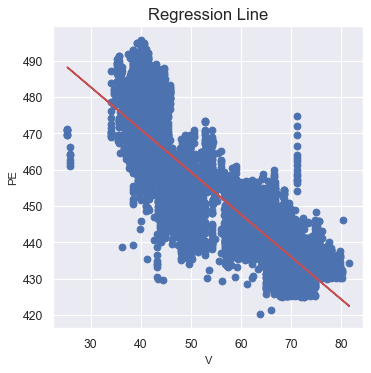

In [16]:
# Visualizing the regression line

figure(figsize=(5, 5), dpi=80)
plt.scatter(x, y)
plt.plot(x, 517.801526 + -1.168135*x, 'r')
plt.title('Regression Line', fontsize = 15)
plt.xlabel('V', fontsize = 10)
plt.ylabel('PE', fontsize = 10)
plt.show()

In [17]:
# Predicting y_value

y_pred = lr.predict(x_sm)
y_pred = y_pred.to_frame(name='PE')

In [18]:
# Counting the number of outliers in the dataset by the inter quartile method

low_lim = df_desc.T['V']['first quartile'] - 1.5 * df_desc.T['V']['interquartile range']
up_lim = df_desc.T['V']['third quartile'] + 1.5 * df_desc.T['V']['interquartile range']
print("low_limit is:", low_lim)
print("up_limit is:", up_lim)

df_outliers = df[((df[['V']] < low_lim) |(df[['V']] > up_lim)).any(axis=1)]
print('\n')
print("Outliers:")
print(df_outliers[['V']])

print('\n')
print("Count of outliers is:",len(df_outliers))

low_limit is: 4.539999999999999
up_limit is: 103.74000000000001


Outliers:
Empty DataFrame
Columns: [V]
Index: []


Count of outliers is: 0


      cooks_distance   p-value
0       4.829366e-05  0.999952
1       1.408450e-08  1.000000
2       4.933077e-04  0.999507
3       1.482397e-05  0.999985
4       1.885601e-08  1.000000
...              ...       ...
9563    6.221848e-08  1.000000
9564    1.038173e-05  0.999990
9565    5.062615e-06  0.999995
9566    1.558170e-06  0.999998
9567    7.567830e-05  0.999924

[9568 rows x 2 columns]


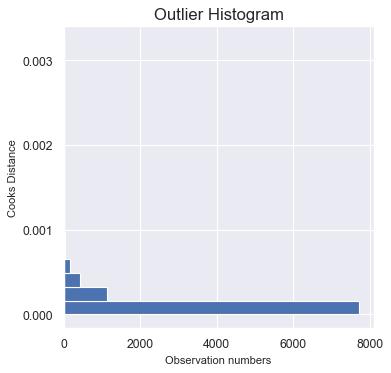

In [19]:
# Data points with large residuals (outliers) and/or high leverage may distort the outcome and accuracy of a regression. 
# Cook’s distance is used to identify influential observations in a regression model.
# Essentially Cook’s distance measures how much all of the fitted values in the model change when the ith observation is deleted.
# The larger the value for Cook’s distance, the more influential a given observation.
# A general rule of thumb is that any observation with a Cook’s distance greater than 4/n (where n = total observations) is considered to be highly influential.

# Create instance of influence

influence = lr.get_influence()

# Obtain Cook's distance for each observation

cooks = influence.cooks_distance
cooks = pd.DataFrame(np.column_stack(cooks),columns=['cooks_distance','p-value'])
print(cooks)

# Outlier detection

figure(figsize=(5, 5), dpi=80)
plt.yticks(np.arange(0, 0.02, 0.001))
plt.hist(cooks['cooks_distance'].to_list(), bins=20, orientation='horizontal') 
plt.title('Outlier Histogram', fontsize = 15)
plt.xlabel('Observation numbers', fontsize = 10)
plt.ylabel('Cooks Distance', fontsize = 10)
plt.show()

In [20]:
# Third predictor - AP

x = df[['AP']]
y = df[['PE']]

# By default, the statsmodel library fits a line that passes through the origin. But if we observe the simple linear regression equation y = c + mx, it has an intercept value as c. So, to have an intercept, we need to add the add_constant attribute manually.
# Adding a constant to get an intercept

x_sm = sm.add_constant(x)

# Fitting the resgression line using 'OLS'(Ordinary Least Square) method

lr = sm.OLS(y, x_sm).fit()

# Printing the parameters

print("Intercept and Slope:")
lr.params

Intercept and Slope:


const   -1055.260989
AP          1.489872
dtype: float64

In [21]:
# Performing a summary to list out all the different parameters of the regression line fitted

print("Summary:")
lr.summary()

Summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:35:47   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.000   -1105.167   -1005.355
AP             1.4899      0.025     59.296      0.000       1.441       1.539
==============================================================================
Omnibus:                      525.438   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.290
Skew:                           0.616   Prob(JB):                    1.10e-133
Kurtosis:                       2.859   Cond. No.                     1.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The coefficient for AP is 1.4899, and its corresponding p-value is very low, almost 0. That means that this predictor is statistically significant.

R-squared value is 0.269, which means that only 27% of the PE variance can be explained by the AP column using this line.

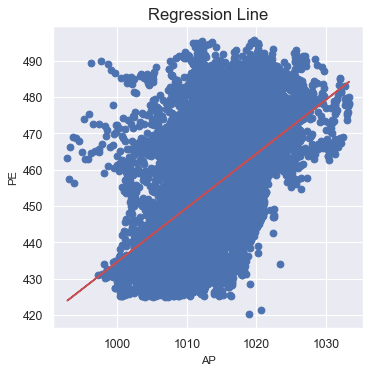

In [22]:
# Visualizing the regression line

figure(figsize=(5, 5), dpi=80)
plt.scatter(x, y)
plt.plot(x, -1055.260989 + 1.489872*x, 'r')
plt.title('Regression Line', fontsize = 15)
plt.xlabel('AP', fontsize = 10)
plt.ylabel('PE', fontsize = 10)
plt.show()

In [23]:
# Predicting y_value

y_pred = lr.predict(x_sm)
y_pred = y_pred.to_frame(name='PE')

In [24]:
# Counting the number of outliers in the dataset by the inter quartile method

low_lim = df_desc.T['AP']['first quartile'] - 1.5 * df_desc.T['AP']['interquartile range']
up_lim = df_desc.T['AP']['third quartile'] + 1.5 * df_desc.T['AP']['interquartile range']
print("low_limit is:", low_lim)
print("up_limit is:", up_lim)

df_outliers = df[((df[['AP']] < low_lim) |(df[['AP']] > up_lim)).any(axis=1)]
print('\n')
print("Outliers:")
print(df_outliers[['AP']])

print('\n')
print("Count of outliers is:",len(df_outliers))

low_limit is: 996.8600000000001
up_limit is: 1029.5


Outliers:
           AP
238   1030.46
319   1033.25
368   1030.18
536   1031.10
571   1029.65
...       ...
9068   992.89
9159  1031.71
9267  1031.21
9342  1031.32
9366  1030.61

[88 rows x 1 columns]


Count of outliers is: 88


      cooks_distance   p-value
0       5.509639e-05  0.999945
1       2.283975e-04  0.999772
2       3.258436e-04  0.999674
3       3.542519e-06  0.999996
4       2.337129e-04  0.999766
...              ...       ...
9563    5.152473e-06  0.999995
9564    6.551920e-08  1.000000
9565    1.452406e-04  0.999855
9566    9.445477e-05  0.999906
9567    1.740664e-05  0.999983

[9568 rows x 2 columns]


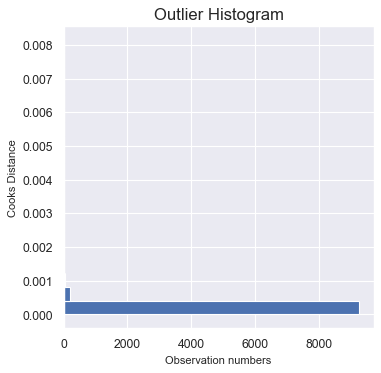

In [25]:
# Data points with large residuals (outliers) and/or high leverage may distort the outcome and accuracy of a regression. 
# Cook’s distance is used to identify influential observations in a regression model.
# Essentially Cook’s distance measures how much all of the fitted values in the model change when the ith observation is deleted.
# The larger the value for Cook’s distance, the more influential a given observation.
# A general rule of thumb is that any observation with a Cook’s distance greater than 4/n (where n = total observations) is considered to be highly influential.

# Create instance of influence

influence = lr.get_influence()

# Obtain Cook's distance for each observation

cooks = influence.cooks_distance
cooks = pd.DataFrame(np.column_stack(cooks),columns=['cooks_distance','p-value'])
print(cooks)

# Outlier detection

figure(figsize=(5, 5), dpi=80)
plt.yticks(np.arange(0, 0.02, 0.001))
plt.hist(cooks['cooks_distance'].to_list(), bins=20, orientation='horizontal') 
plt.title('Outlier Histogram', fontsize = 15)
plt.xlabel('Observation numbers', fontsize = 10)
plt.ylabel('Cooks Distance', fontsize = 10)
plt.show()

In [26]:
# Fourth predictor - RH

x = df[['RH']]
y = df[['PE']]

# By default, the statsmodel library fits a line that passes through the origin. But if we observe the simple linear regression equation y = c + mx, it has an intercept value as c. So, to have an intercept, we need to add the add_constant attribute manually.
# Adding a constant to get an intercept

x_sm = sm.add_constant(x)

# Fitting the resgression line using 'OLS'(Ordinary Least Square) method

lr = sm.OLS(y, x_sm).fit()

# Printing the parameters

print("Intercept and Slope:")
lr.params

Intercept and Slope:


const    420.961766
RH         0.455650
dtype: float64

In [27]:
# Performing a summary to list out all the different parameters of the regression line fitted

print("Summary:")
lr.summary()

Summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:35:47   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.000     419.349     422.574
RH             0.4557      0.011     41.399      0.000       0.434       0.477
==============================================================================
Omnibus:                      772.278   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.245
Skew:                           0.231   Prob(JB):                     4.75e-70
Kurtosis:                       2.234   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient for RH is 0.4557, and its corresponding p-value is very low, almost 0. That means that this predictor is statistically significant.

R-squared value is 0.152, which means that only 15% of the PE variance can be explained by the RH column using this line.

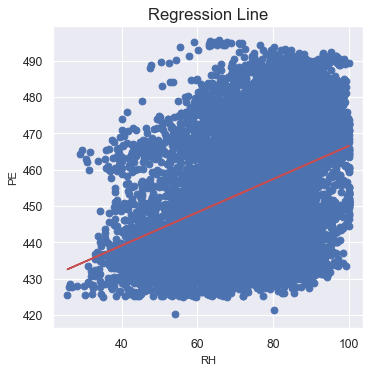

In [28]:
# Visualizing the regression line

figure(figsize=(5, 5), dpi=80)
plt.scatter(x, y)
plt.plot(x, 420.961766 + 0.455650*x, 'r')
plt.title('Regression Line', fontsize = 15)
plt.xlabel('RH', fontsize = 10)
plt.ylabel('PE', fontsize = 10)
plt.show()

In [29]:
# Predicting y_value

y_pred = lr.predict(x_sm)
y_pred = y_pred.to_frame(name='PE')

In [30]:
# Counting the number of outliers in the dataset by the inter quartile method

low_lim = df_desc.T['RH']['first quartile'] - 1.5 * df_desc.T['RH']['interquartile range']
up_lim = df_desc.T['RH']['third quartile'] + 1.5 * df_desc.T['RH']['interquartile range']
print("low_limit is:", low_lim)
print("up_limit is:", up_lim)

df_outliers = df[((df[['RH']] < low_lim) |(df[['RH']] > up_lim)).any(axis=1)]
print('\n')
print("Outliers:")
print(df_outliers[['RH']])

print('\n')
print("Count of outliers is:",len(df_outliers))

low_limit is: 31.073750000000004
up_limit is: 117.08375


Outliers:
         RH
789   25.89
2262  28.16
3603  29.43
4367  26.67
6472  29.86
7983  30.59
8061  25.56
8737  30.83
8751  28.81
9015  26.30
9074  30.34
9075  30.99


Count of outliers is: 12


      cooks_distance   p-value
0       1.698030e-05  0.999983
1       5.088060e-06  0.999995
2       3.698824e-04  0.999630
3       1.967935e-05  0.999980
4       5.969319e-05  0.999940
...              ...       ...
9563    2.998747e-06  0.999997
9564    8.437611e-05  0.999916
9565    1.001861e-04  0.999900
9566    6.147522e-05  0.999939
9567    4.677079e-07  1.000000

[9568 rows x 2 columns]


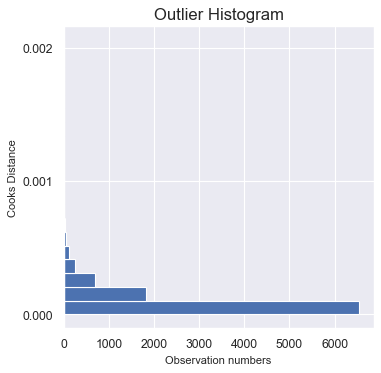

In [31]:
# Data points with large residuals (outliers) and/or high leverage may distort the outcome and accuracy of a regression. 
# Cook’s distance is used to identify influential observations in a regression model.
# Essentially Cook’s distance measures how much all of the fitted values in the model change when the ith observation is deleted.
# The larger the value for Cook’s distance, the more influential a given observation.
# A general rule of thumb is that any observation with a Cook’s distance greater than 4/n (where n = total observations) is considered to be highly influential.

# Create instance of influence

influence = lr.get_influence()

# Obtain Cook's distance for each observation

cooks = influence.cooks_distance
cooks = pd.DataFrame(np.column_stack(cooks),columns=['cooks_distance','p-value'])
print(cooks)

# Outlier detection

figure(figsize=(5, 5), dpi=80)
plt.yticks(np.arange(0, 0.02, 0.001))
plt.hist(cooks['cooks_distance'].to_list(), bins=20, orientation='horizontal') 
plt.title('Outlier Histogram', fontsize = 15)
plt.xlabel('Observation numbers', fontsize = 10)
plt.ylabel('Cooks Distance', fontsize = 10)
plt.show()

There is a statistically significant association between each of the predictors and the response since each of them have a very small p-value(<0.0001) as seen from each of the model summaries above. Smaller p-values indicate that we can reject the null hypothesis which in turn means that the coefficient values of the predictors are not 0 but do have some value implying that the response is dependent on them.
For outlier detection, the number of outliers have been calculated using the interquartile method and Cook's distance has been used as a measure to check the number of influential outliers. A general rule of thumb is that any observation with a Cook’s distance greater than 4/n (where n = total observations) is considered to be highly influential. In our case, this number is 4/6697(number of observations that the model 'lr' has been fit on) = 0.00059. As all of the cook's distances in each of the models is lesser than this number, there are no influential outliers and hence there is no need to delete any of the outliers as they won't merit any change in the performance of the model.

# (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : Bj = 0??

In [32]:
# Multiple Linear Regression

x = df[['AT','V','AP','RH']]
y = df[['PE']]

# Adding a constant to get an intercept

x_sm = sm.add_constant(x)

# Fitting the resgression line using 'OLS'(Ordinary Least Square) method

mlr = sm.OLS(y, x_sm).fit()

# Printing the parameters

print("Intercept and Slope:")
print(mlr.params)

# Performing a summary to list out all the different parameters of the regression line fitted

print('\n')
print("Summary:")
print(mlr.summary())

# Predicting y_value 

y_pred = mlr.predict(x_sm)

Intercept and Slope:
const    454.609274
AT        -1.977513
V         -0.233916
AP         0.062083
RH        -0.158054
dtype: float64


Summary:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:35:47   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.

According to the multiple linear regression model summary above, there is a statistically significant association between each of the predictors and the response since each of them have a very small p-value(<0.0001).

# (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

In [33]:
regr_coeff_df = pd.DataFrame(data={'Type of Linear Regression':['Simple','Multiple'],'AT':[-2.17132,-1.9775],'V':[-1.168135,-0.2339],'AP':[1.489872,0.062083],'RH':[0.455650,-0.158054]})
regr_coeff_df                     

,Type of Linear Regression,AT,V,AP,RH
0,Simple,-2.17132,-1.168135,1.489872,0.455650
1,Multiple,-1.97750,-0.233900,0.062083,-0.158054


We see that there is a decrease in the absolute coefficient values of the predictors when we shift to Multiple Linear Regression from Simple Linear Regression. This implies that the contribution of each of the predictors to the response has reduced on shifting to Multiple Linear Regression. Also, the coefficient of 'RH', which was previously positive has now become negative.

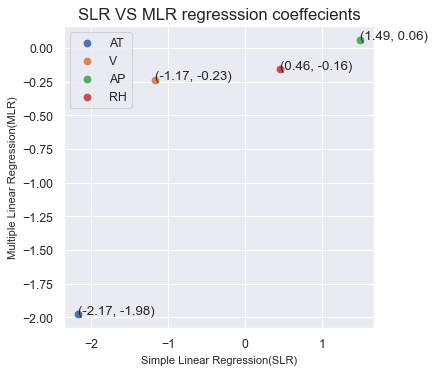

In [34]:
figure(figsize=(5, 5), dpi=80)
plt.scatter(regr_coeff_df['AT'][0],regr_coeff_df['AT'][1])
plt.scatter(regr_coeff_df['V'][0],regr_coeff_df['V'][1])
plt.scatter(regr_coeff_df['AP'][0],regr_coeff_df['AP'][1])
plt.scatter(regr_coeff_df['RH'][0],regr_coeff_df['RH'][1])

for x in regr_coeff_df.columns[1:]: 
    plt.text(regr_coeff_df[x][0],regr_coeff_df[x][1] ,'('+ str(round(regr_coeff_df[x][0],2)) + ', '+ str(round(regr_coeff_df[x][1],2)) +')')
    
plt.title('SLR VS MLR regresssion coeffecients', fontsize = 15)
plt.xlabel('Simple Linear Regression(SLR)', fontsize = 10)
plt.ylabel('Multiple Linear Regression(MLR)', fontsize = 10)
plt.legend(['AT','V','AP','RH'])
plt.show()

# (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form Y = B0 + B1X + B2(X^2) + B3(X^3) + e

In [35]:
x = df[['AT']]
y = df[['PE']]

# Fitting a polynomial model

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

# Fitting the resgression line using 'OLS'(Ordinary Least Square) method

poly_model = sm.OLS(y, x_poly).fit()

# Printing the parameters

print("Intercept and Slope:")
print(poly_model.params)

# Performing a summary to list out all the different parameters of the regression line fitted

print('\n')
print("Summary:")
print(poly_model.summary())

# Predicting y_value

y_pred = poly_model.predict(x_poly)

Intercept and Slope:
const    492.728143
x1        -0.610346
x2        -0.125138
x3         0.002675
dtype: float64


Summary:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:35:48   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----

The quadratic and cubic terms of 'AT' are both statistically significant(since p<0.0001).This means that there is evidence of nonlinear association between the predictor 'AT' and the response.

In [36]:
x = df[['V']]
y = df[['PE']]

# Fitting a polynomial model

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

# Fitting the resgression line using 'OLS'(Ordinary Least Square) method

poly_model = sm.OLS(y, x_poly).fit()

# Printing the parameters

print("Intercept and Slope:")
print(poly_model.params)

# Performing a summary to list out all the different parameters of the regression line fitted

print('\n')
print("Summary:")
print(poly_model.summary())

# Predicting y_value

y_pred = poly_model.predict(x_poly)

Intercept and Slope:
const    554.146849
x1        -2.144377
x2        -0.002712
x3         0.000134
dtype: float64


Summary:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:35:48   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----

The cubic term of 'V' is statistically significant(since p is <0.05).This means that there is evidence of nonlinear association between the predictor 'V' and the response.

In [37]:
x = df[['AP']]
y = df[['PE']]

# Fitting a polynomial model

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

# Fitting the resgression line using 'OLS'(Ordinary Least Square) method

poly_model = sm.OLS(y, x_poly).fit()

# Printing the parameters

print("Intercept and Slope:")
print(poly_model.params)

# Performing a summary to list out all the different parameters of the regression line fitted

print('\n')
print("Summary:")
print(poly_model.summary())

# Predicting y_value

y_pred = poly_model.predict(x_poly)

Intercept and Slope:
const     0.074694
x1       25.255593
x2       -0.049952
x3        0.000025
dtype: float64


Summary:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:35:48   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------

The quadratic and cubic terms of 'AP' are both statistically significant(since p<0.0001).This means that there is evidence of nonlinear association between the predictor 'AP' and the response.

In [38]:
x = df[['RH']]
y = df[['PE']]

# Fitting a polynomial model

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

# Fitting the resgression line using 'OLS'(Ordinary Least Square) method

poly_model = sm.OLS(y, x_poly).fit()

# Printing the parameters

print("Intercept and Slope:")
print(poly_model.params)

# Performing a summary to list out all the different parameters of the regression line fitted

print('\n')
print("Summary:")
print(poly_model.summary())

# Predicting y_value

y_pred = poly_model.predict(x_poly)

Intercept and Slope:
const    468.413536
x1        -1.729211
x2         0.032145
x3        -0.000152
dtype: float64


Summary:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:35:48   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----

The quadratic and cubic terms of 'RH' are both statistically significant(since p<0.0001). This means that there is evidence of nonlinear association between the predictor 'RH' and the response.

# (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [39]:
# Fitting the resgression line using 'OLS'(Ordinary Least Square) method

interaction_model = smf.ols(formula = 'PE ~ AT + V + AP + RH + I(AT*V) + I(AT*AP) + I(AT*RH) + I(V*AP) + I(V*RH) + I(AP*RH)', 
               data = df).fit()

# Printing the parameters

print("Intercept and Slope:")
print(interaction_model.params)

# Performing a summary to list out all the different parameters of the regression line fitted

print('\n')
print("Summary:")
print(interaction_model.summary())

Intercept and Slope:
Intercept     685.782468
AT             -4.347014
V              -7.674858
AP             -0.152355
RH              1.570907
I(AT * V)       0.020971
I(AT * AP)      0.001759
I(AT * RH)     -0.005230
I(V * AP)       0.006812
I(V * RH)       0.000839
I(AP * RH)     -0.001612
dtype: float64


Summary:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:35:48   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10         

The interactions between 'AT' and 'V','AT' and 'RH' & 'V' and 'AP' are all statistically significant(since p<0.0001).The interaction between 'AP' and 'RH' is also a little statistically significant(since p is <0.05) This means that there is evidence of association of interactions of the mentioned predictors with the response.

# (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [40]:
# Multiple Linear Regression

x = df[['AT','V','AP','RH']]
y = df[['PE']]

# Splitting the varaibles as training and testing in a ratio of 70 to 30

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

# Adding a constant to get an intercept

x_train_sm = sm.add_constant(x_train)

# Fitting the resgression line using 'OLS'(Ordinary Least Square) method

mlr = sm.OLS(y_train, x_train_sm).fit()

# Printing the parameters

print("Intercept and Slope:")
print(mlr.params)

# Performing a summary to list out all the different parameters of the regression line fitted

print('\n')
print("Summary:")
print(mlr.summary())

# Predicting y_value using training data of x

y_train_pred = mlr.predict(x_train_sm)

# # MSE for training data

MSE_train = mean_squared_error(y_train, y_train_pred)
print('\n')
print("MSE_train:",MSE_train)

# Adding a constant to get an intercept

x_test_sm = sm.add_constant(x_test)

# Predicting the y values corresponding to x_test_sm

y_test_pred = mlr.predict(x_test_sm)

# MSE for test data

MSE_test = mean_squared_error(y_test, y_test_pred)
print("MSE_test:",MSE_test)

Intercept and Slope:
const    464.519613
AT        -1.976436
V         -0.235581
AP         0.052473
RH        -0.158940
dtype: float64


Summary:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 2.241e+04
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:35:48   Log-Likelihood:                -19558.
No. Observations:                6697   AIC:                         3.913e+04
Df Residuals:                    6692   BIC:                         3.916e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.

In [41]:
x = df[['AT','V','AP','RH']]
y = df[['PE']]

# Splitting the varaibles as training and testing

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


df_train = pd.concat([x_train,y_train],axis=1).reset_index()

# Fitting the resgression line using 'OLS'(Ordinary Least Square) method

combined_model = smf.ols(formula = 'PE ~ AT + V + AP + RH + I(AT**2) + I(V**2) + I(AP**2) + I(RH**2) + I(AT*V) + I(AT*AP) + I(AT*RH) + I(V*AP) + I(V*RH) + I(AP*RH)', 
                data = df_train).fit()

# Printing the parameters

print("Intercept and Slope:")
print(combined_model.params)

# Performing a summary to list out all the different parameters of the regression line fitted

print('\n')
print("Summary:")
print(combined_model.summary())

Intercept and Slope:
Intercept    -8971.460683
AT              -4.823695
V               -2.380870
AP              18.430345
RH               4.663327
I(AT ** 2)       0.016370
I(V ** 2)       -0.001190
I(AP ** 2)      -0.008952
I(RH ** 2)      -0.001784
I(AT * V)        0.011337
I(AT * AP)       0.002154
I(AT * RH)      -0.005683
I(V * AP)        0.001944
I(V * RH)        0.000193
I(AP * RH)      -0.004366
dtype: float64


Summary:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     7424.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:35:48   Log-Likelihood:                -19090.
No. Observations:                6697   AIC:                         3.821e+04
Df Residua

We see that the terms 'V^2','AT * AP','V * AP' and 'V * RH' are not statistically significant since their p-value is greater than 0.05. Hence we remove these terms from our regression equation and implement the model again.

In [42]:
x = df[['AT','V','AP','RH']]
y = df[['PE']]

# Splitting the varaibles as training and testing

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


df_train = pd.concat([x_train,y_train],axis=1).reset_index()

# Fitting the resgression line using 'OLS'(Ordinary Least Square) method

combined_model = smf.ols(formula = 'PE ~ AT + V + AP + RH + I(AT**2) + I(AP**2) + I(RH**2) + I(AT*V) + I(AT*RH) + I(AP*RH)', 
                data = df_train).fit()

# Printing the parameters

print("Intercept and Slope:")
print(combined_model.params)

# Performing a summary to list out all the different parameters of the regression line fitted

print('\n')
print("Summary:")
print(combined_model.summary())

# Predicting y_value using training data of x

y_train_pred = combined_model.predict(x_train)

# MSE for training data

MSE_train = mean_squared_error(y_train, y_train_pred)
print('\n')
print("MSE_train:",MSE_train)

# Predicting the y values corresponding to x_test

y_test_pred = combined_model.predict(x_test)

# MSE for test data

MSE_test = mean_squared_error(y_test, y_test_pred)
print("MSE_test:",MSE_test)

Intercept and Slope:
Intercept    -11133.458711
AT               -2.427300
V                -0.454401
AP               22.465863
RH                5.900548
I(AT ** 2)        0.017400
I(AP ** 2)       -0.010831
I(RH ** 2)       -0.001898
I(AT * V)         0.007617
I(AT * RH)       -0.006494
I(AP * RH)       -0.005546
dtype: float64


Summary:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.039e+04
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:35:48   Log-Likelihood:                -19094.
No. Observations:                6697   AIC:                         3.821e+04
Df Residuals:                    6686   BIC:                         3.829e+04
Df Model:               

We find that the train and test MSE's have reduced now and this new model containing only statistically significant terms involving all possible interaction terms and quadratic nonlinearities is an improved model and does a better job at reducing the MSE's than the simpler model.

# (i) KNN Regression:

(i) i. Perform k-nearest neighbor regression for this dataset using both normalized
and raw features. Find the value of k belonging to {1; 2; : : : ; 100} that gives you the
best fit. Plot the train and test errors in terms of 1/k.

Optimal k: 5


Train MSE for k_opt: 10.132056471853076
Test MSE for k_opt: 17.178110332288398




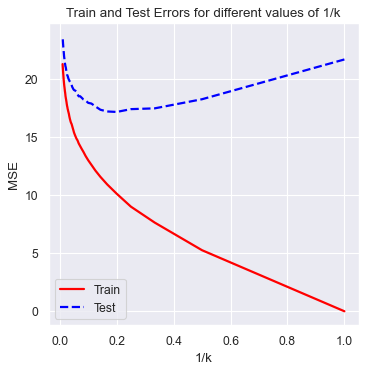

In [43]:
x = df[['AT','V','AP','RH']]
y = df[['PE']]

# Splitting the varaibles as training and testing

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

# Use sklearn to implement the KNN algorithm 
# Defualt distance metric for KNN in sklearn is the Euclidean metric
# Run it for all values of k from 1 to 100 
# Choose the optimal k as the k which gives the minimum test error

train_errors = []
test_errors = []

k_values = []
inverse_k_values=[]

for i in range(1,101,1):
    k_values.append(i)
    inverse_k_values.append(1/i)

for k in k_values: 
    knn = neighbors.KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test)
    train_error = mean_squared_error(y_train,y_train_pred)
    test_error = mean_squared_error(y_test,y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

i_optim = np.argmin(test_errors)
k_optim = k_values[i_optim]

print("Optimal k:",k_optim)
print('\n')
print("Train MSE for k_opt:",train_errors[i_optim])
print("Test MSE for k_opt:",np.min(test_errors))
print('\n')

figure(figsize=(5, 5), dpi=80)
plt.plot(inverse_k_values,train_errors, color='red', label='Train Error', linewidth=2)
plt.plot(inverse_k_values,test_errors, color='blue', label='Test Error', linewidth=2, linestyle='dashed')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.title('Train and Test Errors for different values of 1/k') 
plt.legend(['Train','Test'])

Optimal k: 8


Train MSE for k_opt: 10.76981059779566
Test MSE for k_opt: 17.530127305381402




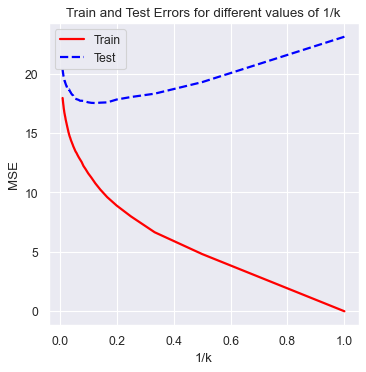

In [44]:
scaler = MinMaxScaler()

x = df[['AT','V','AP','RH']]
y = df[['PE']]

# Splitting the varaibles as training and testing

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

# Normalize the features(independent variables) using the MinMaxScaler

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Use sklearn to implement the KNN algorithm 
# Defualt distance metric for KNN in sklearn is the Euclidean metric
# Run it for all values of k from 1 to 100 
# Choose the optimal k as the k which gives the minimum test error

train_errors = []
test_errors = []

k_values = []
inverse_k_values=[]

for i in range(1,101,1):
    k_values.append(i)
    inverse_k_values.append(1/i)

for k in k_values: 
    knn = neighbors.KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test)
    train_error = mean_squared_error(y_train,y_train_pred)
    test_error = mean_squared_error(y_test,y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

i_optim = np.argmin(test_errors)
k_optim = k_values[i_optim]

print("Optimal k:",k_optim)
print('\n')
print("Train MSE for k_opt:",train_errors[i_optim])
print("Test MSE for k_opt:",np.min(test_errors))
print('\n')

figure(figsize=(5, 5), dpi=80)
plt.plot(inverse_k_values,train_errors, color='red', label='Train Error', linewidth=2)
plt.plot(inverse_k_values,test_errors, color='blue', label='Test Error', linewidth=2, linestyle='dashed')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.title('Train and Test Errors for different values of 1/k') 
plt.legend(['Train','Test'])

# (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

We observed that the the linear regression model that has the smallest test error is the one containing only statistically significant terms involving all possible interaction terms and quadratic nonlinearities. It has values:- MSE_train: 17.54 and MSE_test: 19.57.The KNN regression model with raw features for an optimal k of 5 has values:- MSE_train: 10.13 and MSE_test: 17.18.The KNN regression model with normalized features for an optimal k of 3 has values:- MSE_train: 6.69 and MSE_test: 16.02.Clearly, the KNN regression model with normalized features is the winner.It is so, since when we normalize the data, we ensure that the effect of different ranges and measurement units between variables is nullified which in turn improves the performance of the model by a great amount.The KNN regression model with raw features cuts it close with the linear regression model but still outperforms it by some degree. 

# 2. ISLR: 2.4.1 For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

(a) The sample size n is extremely large, and the number of predictors p is small.

Better. When the sample size n is extremely large, a flexible method would be able to fit the data better than an inflexible method since it would have a lower bias.

(b) The number of predictors p is extremely large, and the number of observations n is small.

Worse. A flexible method would overfit to the small number of observations.

(c) The relationship between the predictors and response is highly non-linear.

Better. A flexible method would fit better than an inflexible method since it would have more degrees of freedom to capture the non-linearity.

(d) The variance of the error terms, i.e. σ^2 = Var(e), is extremely high.

Worse. A flexible method would easily fit to the noise in the error terms and therefore increase the variance.

# 3. ISLR: 2.4.7 The table below provides a training data set containing six observations, three predictors, and one qualitative response variable. Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

(a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

The Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0 :-
Obs 1 : 3
Obs 2 : 2
Obs 3 : 3.16
Obs 4 : 2.24
Obs 5 : 1.41
Obs 6 : 1.73

(b) What is our prediction with K = 1? Why?

Our prediction with K=1 would be 'Green' since our response would be the same as the response of our nearest neighbor i.e. Obs 5.

(c) What is our prediction with K = 3? Why?

Our prediction with K=3 would be 'Red' since our response would be the majority of the responses of our nearest neighbors i.e. Obs 2,5 and 6.

(d) If the Bayes decision boundary in this problem is highly nonlinear,
then would we expect the best value for K to be large or
small? Why?

If the Bayes decision boundary in this problem is highly nonlinear, then we would expect the best value for K to be small since as K becomes larger, the decision boundary would become more inflexible(i.e. linear).